In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D ,GlobalMaxPooling2D, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from keras import backend as K
import cv2
from tensorflow import keras

In [ ]:
os.chdir("/content/drive/MyDrive")

In [ ]:
!unzip photos_resized.zip -d photos

In [2]:
path = "/content/drive/MyDrive/photos/" #crear path a los directorios
training_data_dir = path + "train1" 
validation_data_dir = path + "validation1" 
test_data_dir = path + "test1" 

In [3]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

test_data_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=1,
    horizontal_flip=True,
    vertical_flip=True)

In [4]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,  
    target_size=(500, 500),
    batch_size=9,
    class_mode="categorical")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(500, 500),
    batch_size=9,
    class_mode="categorical",
    shuffle= False)  
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(500, 500),
    batch_size=1,
    class_mode="categorical") 

Found 8245 images belonging to 10 classes.
Found 703 images belonging to 10 classes.
Found 2852 images belonging to 10 classes.


EfficientNetB7

In [ ]:
!pip install -U efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.7/dist-packages (1.1.1)


In [ ]:
import efficientnet.keras as efn

In [ ]:
base_model = efn.EfficientNetB7(input_shape = (500, 500, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in base_model.layers:  #Since we don’t have to train all the layers, we make them non_trainable:
    layer.trainable = False 

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
checkpoint_filepath = "/content/drive/MyDrive/efficientnetb7_best.h5" #hacer que se guarda el mejor modelo con mejores weights y val acc 
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [ ]:
%%time
history = model.fit( 
    training_generator, 
    epochs=15, 
    validation_data=test_generator, 
    callbacks = [es,callback],
    verbose=1)

Epoch 1/15
917/917 [==============================] - 830s 884ms/step - loss: 4.7286 - acc: 0.2639 - val_loss: 1.5187 - val_acc: 0.5309
Epoch 2/15
917/917 [==============================] - 794s 866ms/step - loss: 2.6696 - acc: 0.4747 - val_loss: 1.4238 - val_acc: 0.5912
Epoch 3/15
917/917 [==============================] - 776s 847ms/step - loss: 2.5090 - acc: 0.5407 - val_loss: 1.1660 - val_acc: 0.6013
Epoch 4/15
917/917 [==============================] - 757s 825ms/step - loss: 2.5994 - acc: 0.5959 - val_loss: 1.1139 - val_acc: 0.6518
Epoch 5/15
917/917 [==============================] - 753s 821ms/step - loss: 2.2588 - acc: 0.6099 - val_loss: 1.1174 - val_acc: 0.6571
Epoch 6/15
917/917 [==============================] - 762s 831ms/step - loss: 2.3144 - acc: 0.6518 - val_loss: 1.0408 - val_acc: 0.6799
Epoch 7/15
917/917 [==============================] - 761s 829ms/step - loss: 2.0124 - acc: 0.6571 - val_loss: 0.8165 - val_acc: 0.7370
Epoch 8/15
917/917 [============================

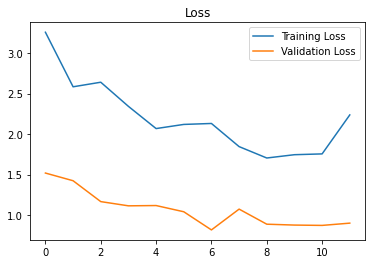

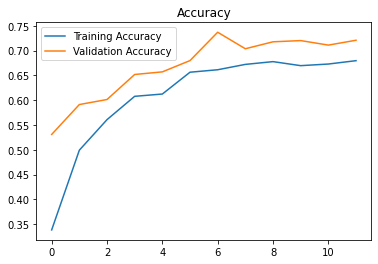

In [ ]:

history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir('/content/drive/MyDrive')
model.save('efficientnetb7.h5')

Add more epochs 

In [ ]:
for layer in base_model.layers:  #Since we don’t have to train all the layers, we make them non_trainable:
    layer.trainable = False 

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu')) 
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
%%time 
history = model.fit( 
    training_generator, 
    epochs=20, 
    validation_data=test_generator, 
    callbacks = es,
    verbose=1)

Epoch 1/20
917/917 [==============================] - 786s 838ms/step - loss: 3.0319 - acc: 0.1607 - val_loss: 1.8290 - val_acc: 0.3194
Epoch 2/20
917/917 [==============================] - 766s 835ms/step - loss: 2.1091 - acc: 0.3170 - val_loss: 1.5584 - val_acc: 0.3924
Epoch 3/20
917/917 [==============================] - 765s 835ms/step - loss: 1.9022 - acc: 0.4261 - val_loss: 1.2279 - val_acc: 0.5964
Epoch 4/20
917/917 [==============================] - 754s 822ms/step - loss: 1.6181 - acc: 0.5584 - val_loss: 1.1318 - val_acc: 0.6469
Epoch 5/20
917/917 [==============================] - 758s 827ms/step - loss: 1.5140 - acc: 0.6025 - val_loss: 0.9853 - val_acc: 0.6953
Epoch 6/20
917/917 [==============================] - 750s 818ms/step - loss: 1.4333 - acc: 0.6346 - val_loss: 0.9404 - val_acc: 0.6988
Epoch 7/20
917/917 [==============================] - 746s 814ms/step - loss: 1.3529 - acc: 0.6408 - val_loss: 0.9149 - val_acc: 0.6942
Epoch 8/20
917/917 [============================

In [ ]:
os.chdir('/content/drive/MyDrive')
model.save('efficientnetb7_2.h5')

In [ ]:
predictions=model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 

In [ ]:
y = validation_generator.classes

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.974     0.649     0.779        57
           1      0.770     0.783     0.777        60
           2      0.640     0.667     0.653        72
           3      0.860     0.766     0.810        64
           4      0.905     0.827     0.865        81
           5      1.000     0.677     0.807        65
           6      0.805     0.946     0.870        74
           7      0.903     0.747     0.818        87
           8      0.687     0.792     0.735        72
           9      0.598     0.944     0.732        71

    accuracy                          0.784       703
   macro avg      0.814     0.780     0.785       703
weighted avg      0.812     0.784     0.786       703



In [ ]:
accuracy_score(yhat,y)

0.7837837837837838

Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(input_shape=(500, 500,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(tf.keras.layers.Dropout(0.20))
base_model.add(Dense(10, activation='softmax'))

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
%%time
history = base_model.fit(training_generator, validation_data = test_generator, steps_per_epoch = 200, epochs = 20)

Epoch 1/20
200/200 [==============================] - 1781s 9s/step - loss: 14.8763 - acc: 0.1388 - val_loss: 10.1574 - val_acc: 0.0856
Epoch 2/20
200/200 [==============================] - 717s 4s/step - loss: 7.7085 - acc: 0.3404 - val_loss: 8.5688 - val_acc: 0.1301
Epoch 3/20
200/200 [==============================] - 612s 3s/step - loss: 5.3604 - acc: 0.4820 - val_loss: 5.3362 - val_acc: 0.3191
Epoch 4/20
200/200 [==============================] - 523s 3s/step - loss: 3.9966 - acc: 0.5446 - val_loss: 3.2020 - val_acc: 0.5491
Epoch 5/20
200/200 [==============================] - 464s 2s/step - loss: 3.3136 - acc: 0.6298 - val_loss: 2.0425 - val_acc: 0.6939
Epoch 6/20
200/200 [==============================] - 422s 2s/step - loss: 2.6837 - acc: 0.6815 - val_loss: 1.1596 - val_acc: 0.7952
Epoch 7/20
200/200 [==============================] - 388s 2s/step - loss: 2.3938 - acc: 0.6919 - val_loss: 1.1500 - val_acc: 0.8015
Epoch 8/20
200/200 [==============================] - 363s 2s/step

In [ ]:
os.chdir('/content/drive/MyDrive')
base_model.save('resnet.h5')

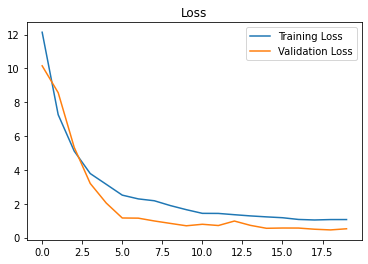

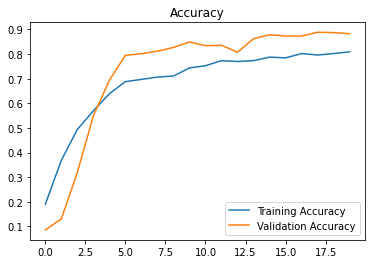

In [ ]:
history = base_model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
predictions=base_model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 8, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 7, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 8, 1, 2, 8, 1, 1, 1, 2, 1,
       1, 1, 6, 1, 1, 1, 1, 2, 8, 2, 2, 2, 2, 2, 2, 8, 8, 2, 2, 8, 2, 2,
       2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 4, 2, 8, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 7, 3, 3, 3, 3, 7,
       3, 3, 3, 3, 3, 3, 3, 7, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       7, 3, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 3, 9, 3,
       3, 3, 3, 3, 3, 3, 9, 6, 3, 3, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
y = validation_generator.classes

In [ ]:
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.914     0.930     0.922        57
           1      0.907     0.817     0.860        60
           2      0.831     0.889     0.859        72
           3      0.927     0.797     0.857        64
           4      0.975     0.975     0.975        81
           5      0.941     0.738     0.828        65
           6      0.918     0.905     0.912        74
           7      0.845     0.943     0.891        87
           8      0.775     0.861     0.816        72
           9      0.870     0.944     0.905        71

    accuracy                          0.885       703
   macro avg      0.890     0.880     0.882       703
weighted avg      0.889     0.885     0.884       703



In [ ]:
accuracy_score(yhat,y)

0.8847795163584637

Resnet50 30 epochs


In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
base_model = ResNet50(input_shape=(500, 500,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(tf.keras.layers.Dropout(0.20))
base_model.add(Dense(10, activation='softmax'))

base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
%%time
history = base_model.fit(training_generator, validation_data = test_generator, steps_per_epoch = 200, epochs = 30)

Epoch 1/30
200/200 [==============================] - 295s 1s/step - loss: 11.9952 - acc: 0.1967 - val_loss: 9.7536 - val_acc: 0.1003
Epoch 2/30
200/200 [==============================] - 298s 1s/step - loss: 7.4196 - acc: 0.3678 - val_loss: 12.1579 - val_acc: 0.1308
Epoch 3/30
200/200 [==============================] - 290s 1s/step - loss: 5.0570 - acc: 0.4866 - val_loss: 10.0629 - val_acc: 0.1967
Epoch 4/30
200/200 [==============================] - 291s 1s/step - loss: 4.1235 - acc: 0.5811 - val_loss: 5.9049 - val_acc: 0.3931
Epoch 5/30
200/200 [==============================] - 287s 1s/step - loss: 3.3337 - acc: 0.6444 - val_loss: 2.4579 - val_acc: 0.6921
Epoch 6/30
200/200 [==============================] - 286s 1s/step - loss: 2.8604 - acc: 0.6778 - val_loss: 1.7618 - val_acc: 0.7724
Epoch 7/30
200/200 [==============================] - 286s 1s/step - loss: 2.6868 - acc: 0.7033 - val_loss: 1.1767 - val_acc: 0.8033
Epoch 8/30
200/200 [==============================] - 283s 1s/step

In [ ]:
os.chdir('/content/drive/MyDrive')
base_model.save('resnet30.h5')

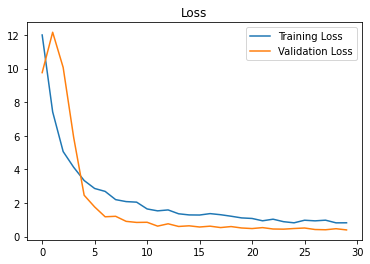

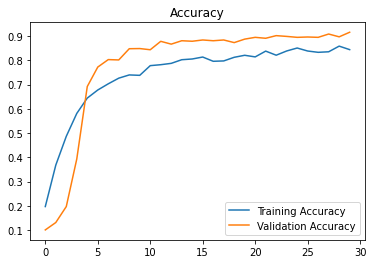

In [ ]:
history = base_model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

Inception V3

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape = (500, 500, 3),include_top=False, weights='imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=5) 

In [ ]:
%%time
history = model.fit( 
    training_generator, 
    epochs=15, 
    validation_data=test_generator, 
    callbacks = es, 
    verbose=1)

Epoch 1/15
917/917 [==============================] - 3843s 4s/step - loss: 3.9612 - acc: 0.5554 - val_loss: 1.1440 - val_acc: 0.7304
Epoch 2/15
917/917 [==============================] - 645s 703ms/step - loss: 0.9422 - acc: 0.7761 - val_loss: 1.5878 - val_acc: 0.7153
Epoch 3/15
917/917 [==============================] - 647s 705ms/step - loss: 0.8018 - acc: 0.8153 - val_loss: 0.6011 - val_acc: 0.8387
Epoch 4/15
917/917 [==============================] - 647s 705ms/step - loss: 0.6196 - acc: 0.8357 - val_loss: 0.7241 - val_acc: 0.8229
Epoch 5/15
917/917 [==============================] - 644s 702ms/step - loss: 0.6681 - acc: 0.8422 - val_loss: 0.5343 - val_acc: 0.8566
Epoch 6/15
917/917 [==============================] - 643s 701ms/step - loss: 0.6691 - acc: 0.8395 - val_loss: 0.6522 - val_acc: 0.8377
Epoch 7/15
917/917 [==============================] - 644s 702ms/step - loss: 0.6058 - acc: 0.8545 - val_loss: 0.5888 - val_acc: 0.8478
Epoch 8/15
917/917 [==============================

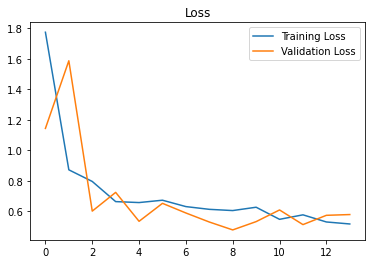

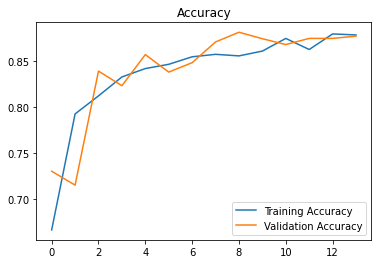

In [ ]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir("/content/drive/MyDrive")
model.save('inception3.h5')

In [ ]:
predictions=model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 0, 1, 0, 1, 1, 1, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 8, 1, 6, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 0, 2, 2, 2, 2, 4, 0, 2, 8, 7, 2, 2, 2, 4, 7, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
y = validation_generator.classes

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.769     0.877     0.820        57
           1      0.862     0.833     0.847        60
           2      0.938     0.847     0.891        72
           3      0.833     0.938     0.882        64
           4      0.875     0.951     0.911        81
           5      1.000     0.846     0.917        65
           6      0.923     0.973     0.947        74
           7      0.907     0.897     0.902        87
           8      0.919     0.944     0.932        72
           9      1.000     0.873     0.932        71

    accuracy                          0.900       703
   macro avg      0.903     0.898     0.898       703
weighted avg      0.906     0.900     0.901       703



In [ ]:
accuracy_score(yhat,y)

0.9004267425320057

Inceptionv3 30 epochs 

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = tf.keras.applications.InceptionV3(input_shape = (500, 500, 3),include_top=False, weights='imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer =tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=20) 

In [9]:
checkpoint_filepath = "/content/drive/MyDrive/inception30_best.h5" #hacer que se guarda el mejor modelo con mejores weights y val acc 
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [10]:
%%time
history = model.fit( 
    training_generator, 
    epochs=30, 
    validation_data=test_generator, 
    callbacks = [es,callback], 
    verbose=1)

Epoch 1/30
917/917 [==============================] - 5932s 6s/step - loss: 4.1579 - acc: 0.5517 - val_loss: 0.8466 - val_acc: 0.7840
Epoch 2/30
917/917 [==============================] - 866s 944ms/step - loss: 0.8526 - acc: 0.7915 - val_loss: 0.9337 - val_acc: 0.7886
Epoch 3/30
917/917 [==============================] - 878s 958ms/step - loss: 0.8005 - acc: 0.8204 - val_loss: 0.7240 - val_acc: 0.8296
Epoch 4/30
917/917 [==============================] - 879s 958ms/step - loss: 0.7374 - acc: 0.8283 - val_loss: 0.6215 - val_acc: 0.8447
Epoch 5/30
917/917 [==============================] - 864s 943ms/step - loss: 0.6914 - acc: 0.8373 - val_loss: 0.5350 - val_acc: 0.8738
Epoch 6/30
917/917 [==============================] - 850s 927ms/step - loss: 0.5749 - acc: 0.8641 - val_loss: 0.7910 - val_acc: 0.8285
Epoch 7/30
917/917 [==============================] - 836s 912ms/step - loss: 0.6332 - acc: 0.8536 - val_loss: 0.7170 - val_acc: 0.8541
Epoch 8/30
917/917 [==============================

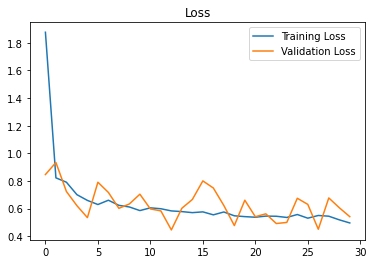

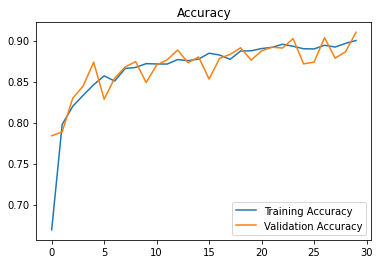

In [11]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [12]:
os.chdir("/content/drive/MyDrive")
model.save('inception3_30.h5')

Optimized with Keras Tuner

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3, padding='same', activation='relu', input_shape=(500,500,3)))
model.add(MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu')) 
model.add(tf.keras.layers.Dense(224, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(lr = 0.0013969),
            metrics=['acc'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping( 
    monitor="val_acc",
    patience=15) 

In [ ]:
history = model.fit( 
    training_generator, 
    epochs=40, 
    validation_data=test_generator, 
    callbacks = [es], 
    verbose=1)

Epoch 1/40
917/917 [==============================] - 590s 643ms/step - loss: 4.7716 - acc: 0.1993 - val_loss: 1.8733 - val_acc: 0.3306
Epoch 2/40
917/917 [==============================] - 589s 643ms/step - loss: 1.8369 - acc: 0.3514 - val_loss: 1.5575 - val_acc: 0.4600
Epoch 3/40
917/917 [==============================] - 587s 640ms/step - loss: 1.6486 - acc: 0.4335 - val_loss: 1.6623 - val_acc: 0.4050
Epoch 4/40
917/917 [==============================] - 586s 639ms/step - loss: 1.5301 - acc: 0.4759 - val_loss: 1.4376 - val_acc: 0.5091
Epoch 5/40
917/917 [==============================] - 587s 640ms/step - loss: 1.3867 - acc: 0.5249 - val_loss: 1.2740 - val_acc: 0.5698
Epoch 6/40
917/917 [==============================] - 587s 640ms/step - loss: 1.2866 - acc: 0.5578 - val_loss: 1.2064 - val_acc: 0.5964
Epoch 7/40
917/917 [==============================] - 583s 636ms/step - loss: 1.1802 - acc: 0.6086 - val_loss: 1.1534 - val_acc: 0.6080
Epoch 8/40
917/917 [============================

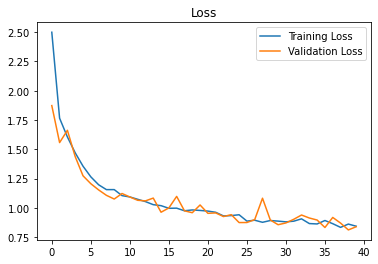

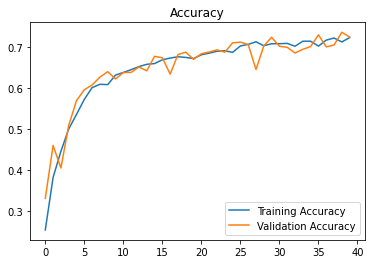

In [ ]:
history = model.history.history

def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()
plot_metrics(history)

In [ ]:
os.chdir("/content/drive/MyDrive")
model.save('redtuner.h5')

In [ ]:
predictions=model.predict(validation_generator)
yhat = predictions.argmax(axis=-1) 
yhat

array([3, 9, 0, 0, 0, 0, 0, 0, 7, 0, 8, 0, 0, 7, 0, 0, 0, 0, 3, 0, 0, 6,
       0, 0, 0, 0, 0, 7, 9, 3, 0, 2, 0, 1, 8, 0, 0, 0, 0, 0, 0, 3, 1, 0,
       0, 8, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 1, 4, 1, 1, 1, 1,
       2, 1, 8, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 5,
       1, 1, 1, 1, 1, 7, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 3, 8, 8, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 8, 8, 2,
       2, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 3, 5, 2, 2, 2, 2, 2,
       4, 2, 7, 2, 8, 1, 2, 2, 2, 2, 2, 5, 3, 8, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 7, 3, 3, 3, 3, 7,
       3, 3, 3, 8, 3, 5, 9, 3, 3, 7, 3, 3, 1, 3, 5, 3, 3, 1, 3, 3, 3, 5,
       9, 3, 3, 5, 1, 3, 3, 3, 9, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 9, 3, 8, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 8, 3, 4, 4, 4, 4,
       4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 8, 8, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
y = validation_generator.classes

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat, digits=3)) 

              precision    recall  f1-score   support

           0      0.780     0.684     0.729        57
           1      0.672     0.750     0.709        60
           2      0.831     0.750     0.788        72
           3      0.530     0.688     0.599        64
           4      0.948     0.901     0.924        81
           5      0.642     0.523     0.576        65
           6      0.968     0.811     0.882        74
           7      0.774     0.828     0.800        87
           8      0.667     0.778     0.718        72
           9      0.768     0.746     0.757        71

    accuracy                          0.754       703
   macro avg      0.758     0.746     0.748       703
weighted avg      0.766     0.754     0.756       703



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yhat,y)

0.7539118065433855